# Implement Logistic Regression from scratch

We will implement Logistic Regression with L1 regularization from scratch and predict the labels of the test data.The correctness of the implementation is verified using multiple "grader" functions/cells which will match our implmentation.

The grader functions would help you validate the correctness of code. 

In [87]:
from google.colab import drive
import pandas as pd
import numpy as np
import numpy as np
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.preprocessing import StandardScaler
from sklearn import linear_model
import matplotlib.pyplot as plt

In [4]:
# Code to mount google drive in case you are loading the data from your google drive
drive.mount('/gdrive')
%cd /gdrive

Mounted at /gdrive
/gdrive


In [6]:
# Loading data from csv file
data_path = '/gdrive/MyDrive/Colab Notebooks/files/LOGIST~1.CSV'
df = pd.read_csv(data_path)
df.sample(5)

,category,text
1009,1,owen delighted with real display michael owen ...
490,1,bellamy under new fire newcastle boss graeme s...
129,1,wolves appoint hoddle as manager glenn hoddle ...
463,1,cup holders man utd visit everton holders manc...
303,1,lennon brands rangers favourites celtic s neil...


In [8]:
df.shape

(1017, 2)

#### **Note:** Here class-0 is of category "business" and class-1 is of category "sport"

In [7]:
# Data Overiview
df['category'].value_counts()

1    509
0    508
Name: category, dtype: int64

### Creating Train and Test Datasets


In [9]:
# Splitting the data into train and test
from sklearn.model_selection import train_test_split

text = df['text']
category = df['category']
train_x, test_x, train_y, test_y = train_test_split(text, category, random_state=42, stratify=category, test_size=0.10)

print("Shape of Train_Text = ", train_x.shape)
print("Shape of Test_Text = ", test_x.shape)
print("Shape of Train_Category = ", train_y.shape)
print("Shape of Train_Category = ", test_y.shape)

Shape of Train_Text =  (915,)
Shape of Test_Text =  (102,)
Shape of Train_Category =  (915,)
Shape of Train_Category =  (102,)


## Custom Implementation

### Instructions:

  1. Read in the train_data.
  2. Vectorize train_data and test_data using sklearns built in tfidf vectorizer.
  3. Ignore unigrams and make use of both **bigrams & trigrams** and also limit the **max features** to **2000** and **minimum document frequency** to **10**.
  4. After the tfidf vectors are generated as mentioned above, next task is to column standardize your data.
  5. We want you to write in comments in your code, the reason you think for standardizing the data in the above step.
  6. You can use sklearn StandardScaler to column standardize your data.
  7. Write a function to initialise your weights & bias. And then run its corresponding grader function.
  8. Write a custom function to calculate sigmoid of a value. And then run its corresponding grader function to cross check your implementation of sigmoid function.
  9. Write a custom function to compute the total loss as the sum of log loss and l1 regularization loss based on true labels and predicted labels and weights. And you can crosscheck your implementation with its corresponding grader.
  10. Write a function to compute gradients for your weights and bias terms, which you have to make use of in updating your weights and bias while training your model.
  11. Implement a custom train function of logistic regression, wherein you take in the following inputs:
        * **X_train** which will be your vectorized text data
        * **y_train** which are the labels for your train data
        * **alpha** = 0.0001 which is the regularization factor (λ) 
        * **eta0** = 0.0001 which will be the learning rate   
        * **tolerance** = 0.001
        
  12. In the custom train function you should make use of a custom SGD function to update the weights and bias terms for **each** of your inputs. 
  13. The custom SGD implemented in the above train function for updating the weights and bias terms should run for many epochs until the difference in loss between two consecutive epochs is less than tolerance.

  14. Here one epoch means a complete iteration of your entire train data.
  15. Your train function should return the follwing:
        * the number of epochs it took to complete the training
        * train loss for all epochs
        * the values for final weights and bias terms.
        
  16. Now run the grader function to check whether the weights and bias obtained from your custom implementation are close enough to that of sklearns implementation.
  17. Next write a custom predict function which takes in as input the weights and bias values that you computed in your train function, and also takes in the test standardized data as input to predict its labels.
  18. Now run the grader function to check the accuracy of your predictions.





### 1. Vectorize train data and test data using sklearn tf-idf in the below cell





In [11]:
'''vectorize train and test data using TF-IDF and store them in train_vectors and test_vectors respectively'''
vect=TfidfVectorizer(ngram_range=(2,3),min_df=10,max_features=2000)
vect.fit(train_x)
train_vectors =vect.transform(train_x)
test_vectors = vect.transform(test_x)
train_vectors.shape, test_vectors.shape

((915, 2000), (102, 2000))

###2. Column standardize the train and test data

In [13]:
'''column standardize the train and test data and store them in train_vectors_stand and test_vectors_stand'''
scaler=StandardScaler()
X_train=scaler.fit_transform(train_vectors.toarray())
X_test =scaler.transform(test_vectors.toarray())

X_train.shape, X_test.shape

((915, 2000), (102, 2000))

### 3. Custom function to intialise your weights and bias terms

In [15]:
def initialize_weights_bias(dim):
    # In this function, we will initialize our weights and bias terms
    w=np.zeros(dim)
    b=0
    return w,b

### 4. Custom function to calculate sigmoid of a value

In [17]:
def custom_sigmoid(z):
    # In this function, we will return sigmoid of z
    sigmoid=1/(1+np.exp(-z))

    return sigmoid

### 5.  Custom function to compute loss function

$logloss = -1*\frac{1}{n}\Sigma_{for each Y_{true},Y_{pred}}(Y_{true}log10(Y_{pred})+(1-Y_{true})log10(1-Y_{pred}))$ 


$L1 loss = \Sigma_{for each w}(|w|)$

$total loss = logloss + alpha*L1loss$<br>
Where alphas is the regularization parameter

In [32]:
def custom_loss(y_true, y_pred, alpha, w):
    #In this function, we will compute total loss which is [(logloss) + (alpha * L1 regularization loss)]
    log_loss =(-1/len(y_true))*np.sum( (y_true*np.log10(y_pred) )+ ((1-y_true)*np.log10(1-y_pred) ))
    l1_loss = np.sum(abs(w))
    total_loss = log_loss+ (alpha*l1_loss)

    return total_loss

### 6. Custom function to updated weights and bias terms


$Li= -(Y_{i}log10(𝝈_{i})-(1-Y_{i})log10(1-𝝈_{i}) + \frac{alpha}{N}(sum(|w|))
$ <br>
<br>
$Where: 𝝈_{i} = σ(w^{T} x_i+b) $ <br>
<br>
And: L1 regularization = $\frac{alpha}{N}(sum(|w|)) $ <br>
Alpha: It is the Regularization parameter <br>
N : number of training examples<br>
σ : sigmoid function <br>
<br>
<br>
<br>
$dLi/dw= -Y_{i}x_{i}(1-𝝈_{i}) + (1-Y_{i})x_{i}𝝈_{i} + \frac{alpha}{N} \frac{w + (1e-5)}{|w + (1e-5)|}  $<br>
NOTE THAT: 1e-5 used in numerator and denominator to avoid division error <br>

$dLi/db= -Y_{i}(1-𝝈_{i}) + (1-Y_{i})𝝈_{i}$<br>
<br>
<br>
Hence,<br>
$dLi/dw= dw = (𝝈_{i} -Y_{i})x_{i} + \frac{alpha}{N}\frac{w + (1e-5)}{|w + (1e-5)|} $<br>
1e-5 used in numerator and denominator to avoid division error <br>
$dLi/db =  db = 𝝈_{i}-Y_{i}$
<br>
<br>
!!NOTE: USE NEGATIVE GRADIENT WHILE UPDATING

### 6a. Custom function to compute Gradient of loss function wrt weights:

In [33]:
def gradient_dw(x, y, w, b, alpha, N):
  # In this function, we will compute the gardient w.r.t. w
    z=custom_sigmoid(np.dot(w,x)+b)
    a=(z-y)*x
    b=alpha/N
    c=(w+(1e-5))/(abs(w+(1e-5)))
    dw=a+(b*c)
    return dw

### 6b.  Custom function to compute Gradient of loss function wrt bias term:

In [34]:
def gradient_db(x, y, w, b):
    # In this function, we will compute the gardient w.r.t. b
    db=custom_sigmoid(np.dot(w,x)+b)-y
    return db

###6c. Custom function to train logistic regression model

$w^{(t+1)}← w^{(t)}- eta0*(dw^{(t)}) $<br>
$b^{(t+1)}←b^{(t)} - eta0*(db^{(t)}) $

In [62]:
def custom_train(X,Y,alpha,eta0,tolerance):
  train_loss=[]
  epoch=0
  N=len(X)
  W,B=initialize_weights_bias(X.shape[1])
  val=True
  while(val):
    for i in range(len(X)):
      dw=gradient_dw(X[i],Y[i],W,B,alpha,len(X))
      db=gradient_db(X[i],Y[i],W,B)
      W=W-(eta0*dw)
      B=B-(eta0*db)
    #--------------predict y_train_pred----------------------------
    Y_Pred=np.array([custom_sigmoid( np.dot(X[j],W)+B ) for j in range(len(X))])
    #------------------Loss-----------------------------------------
    loss=custom_loss(Y,Y_Pred, alpha, W)
    train_loss.append(loss)
    #---Condition to terminate on epoch,if the difference between previous loss and current loss,
    # Is not more than tolerance, and tolerane is 0.001.
    if epoch==0:
      epoch=epoch+1
    elif (train_loss[epoch-1]-train_loss[epoch])<=tolerance:
      val=(False)
    else:
      epoch=epoch+1
  return W,B,train_loss,epoch+1

In [68]:
w,b,train_loss,epochs = custom_train(X_train, train_y.values, 0.0001,0.0001,0.001)
print("W coefficients are {}".format(w))
print()
print("Bias {}".format(b))
print("No of epochs {}".format(epochs))

W coefficients are [-0.02295906 -0.01787967  0.02026318 ...  0.02128643  0.01148989
  0.00377002]

Bias 0.0038470516526658578
No of epochs 19


### 7. Plot the train loss with x as epoch number and y as train loss

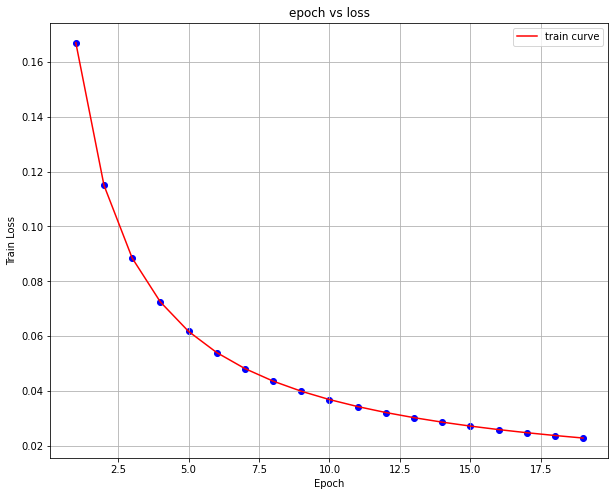

In [82]:
# plotting graph for epoch vs loss for train data
A=[i for i in range(1,epochs+1)]
plt.figure(figsize=(10,8))
plt.plot(A,train_loss,label='train curve',color="red")
plt.scatter(range(1,epochs+1),train_loss,color = 'blue')
plt.title('epoch vs loss')
plt.legend()
plt.xlabel('Epoch')
plt.ylabel('Train Loss')
plt.grid()
plt.show()

### 8. Custom function to make predictions using logistic regression model

In [83]:
def predict(w,b, X):
    '''function to predict label given weights, bias and standardized data'''
    predictions=np.array([1 if 0.5<=custom_sigmoid(np.dot(x,w)+b) else 0 for x in X])
    
    #it should be a numpy array
    return predictions

### Predicting the test data and checking accuracy 

In [86]:
test_preds= predict(w,b,X_test)
test_accuracy= (np.sum(test_y.values==test_preds)/len(test_preds))*100
if(test_accuracy>=90):
  print("Success!")
  print("test_accuracy = {}".format(test_accuracy))
else:
  print("Failed! \n Test accuracy = ", test_accuracy)

Success!
test_accuracy = 99.01960784313727
